# How do the possible starting hands in texas holdem rank against each other

Or: how good is my hand?

Let's start with just one hand (Ace of Hearts, 6 of Hearts) and get a sense of how often it beats one other player

In [1]:
import pandas as pd
from texas_hold_em_utils.card import Card
from texas_hold_em_utils.deck import Deck
from texas_hold_em_utils.hands import HandOfFive

card_1 = Card().from_str("A", "Hearts")
card_2 = Card().from_str("6", "Hearts")

deck = Deck()
# remove my cards from the deck
deck.remove(card_1)
deck.remove(card_2)

In [2]:
# iterate through all possible combinations of the remaining cards and count wins, lossess, and ties
win_count = 0
loss_count = 0
tie_count = 0

for opponent_card_1 in deck.cards: # 50 possible cards
    deck_2 = Deck()
    deck_2.cards = deck.cards.copy()
    deck_2.remove(opponent_card_1)
    for opponent_card_2 in deck_2.cards: # 49 possible cards for each opponent_card_1
        deck_3 = Deck()
        deck_3.cards = deck_2.cards.copy()
        deck_3.remove(opponent_card_2)
        for flop_card_1 in deck_3.cards: # 48 possible cards for each opponent_card_2
            deck_4 = Deck()
            deck_4.cards = deck_3.cards.copy()
            deck_4.remove(flop_card_1)
            for flop_card_2 in deck_4.cards: # 47 possible cards for each flop_card_1
                deck_5 = Deck()
                deck_5.cards = deck_4.cards.copy()
                deck_5.remove(flop_card_2)
                for flop_card_3 in deck_5.cards: # 46 possible cards for each flop_card_2
                    deck_6 = Deck()
                    deck_6.cards = deck_5.cards.copy()
                    deck_6.remove(flop_card_3)
                    for turn_card in deck_6.cards: # 45 possible cards for each flop_card_3
                        deck_7 = Deck()
                        deck_7.cards = deck_6.cards.copy()
                        deck_7.remove(turn_card)
                        for river_card in deck_7.cards: # 44 possible cards for each turn_card
                            my_hand = HandOfFive([card_1, card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
                            opponent_hand = HandOfFive([opponent_card_1, opponent_card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
                            if my_hand > opponent_hand:
                                win_count += 1
                            elif my_hand < opponent_hand:
                                loss_count += 1
                            else:
                                tie_count += 1
                            

KeyboardInterrupt: 

In [3]:
# 503,417,376,000 - half a trillion combinations to explore... not feasible. 
# even if you do a million per second it would take almost 6 days
50 * 49 * 48 * 47 * 46 * 45 * 44

503417376000

# A Better Approach

Take a *random* sample of a few thousand different hands to play against

- Provides a good approximation of the ratio of wins to losses to ties
- Takes far less time so we can try different hands and see how they compare

In [4]:
card_1 = Card().from_str("A", "Hearts")
card_2 = Card().from_str("6", "Hearts")

deck = Deck()
# remove my cards from the deck
deck.remove(card_1)
deck.remove(card_2)

win_count = 0
loss_count = 0
tie_count = 0

for i in range(10000):
    round_deck = Deck()
    round_deck.cards = deck.cards.copy()
    round_deck.shuffle()
    opponent_card_1 = round_deck.draw()
    opponent_card_2 = round_deck.draw()
    flop_card_1 = round_deck.draw()
    flop_card_2 = round_deck.draw()
    flop_card_3 = round_deck.draw()
    turn_card = round_deck.draw()
    river_card = round_deck.draw()
    my_hand = HandOfFive([card_1, card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
    opponent_hand = HandOfFive([opponent_card_1, opponent_card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
    if my_hand > opponent_hand:
        win_count += 1
    elif my_hand < opponent_hand:
        loss_count += 1
    else:
        tie_count += 1
print(f"win count: {win_count}")
print(f"loss count: {loss_count}")
print(f"tie count: {tie_count}")

win count: 5893
loss count: 3790
tie count: 317


In [5]:
100 * (((win_count * 2) + tie_count) / (2 *(win_count + loss_count + tie_count)))

60.51499999999999

So Ace of Hearts, 6 of Hearts wins about 60% of the time. That percentage could vary though, run the 2 cells above again to see the percentage change a bit every time.

# Getting to the actual ranking

That tells us how often a particular hand wins. but it doesn't tell us which hands are the best and how they compare to each other. 
We can use the same process to come up with approximate win percentages for each hand and produce relative rankings.

In [6]:
deck = Deck()
data = pd.DataFrame(columns=['card_1', 'card_2', 'win_rate'])
for card_1 in deck.cards:
    deck_2 = Deck()
    deck_2.cards = deck.cards.copy()
    deck_2.remove(card_1)
    for card_2 in deck_2.cards:
        deck_3 = Deck()
        deck_3.cards = deck_2.cards.copy()
        deck_3.remove(card_2)
        win_count = 0
        loss_count = 0
        tie_count = 0
        for i in range(1000): # takes about 2 minutes to run 1000 simulations for each combination of cards on my machine
            round_deck = Deck()
            round_deck.cards = deck_3.cards.copy()
            round_deck.shuffle()
            opponent_card_1 = round_deck.draw()
            opponent_card_2 = round_deck.draw()
            flop_card_1 = round_deck.draw()
            flop_card_2 = round_deck.draw()
            flop_card_3 = round_deck.draw()
            turn_card = round_deck.draw()
            river_card = round_deck.draw()
            my_hand = HandOfFive([card_1, card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
            opponent_hand = HandOfFive([opponent_card_1, opponent_card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
            if my_hand > opponent_hand:
                win_count += 1
            elif my_hand < opponent_hand:
                loss_count += 1
            else:
                tie_count += 1
        win_rate = 100 * (((win_count * 2) + tie_count) / (2 *(win_count + loss_count + tie_count)))
        data = pd.concat([data, pd.DataFrame([[card_1, card_2, win_rate]], columns=['card_1', 'card_2', 'win_rate'])], ignore_index=True)

C:\Users\amarl\AppData\Local\Temp\ipykernel_31220\2154449094.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([[card_1, card_2, win_rate]], columns=['card_1', 'card_2', 'win_rate'])], ignore_index=True)


<Axes: xlabel='win_rate', ylabel='Count'>

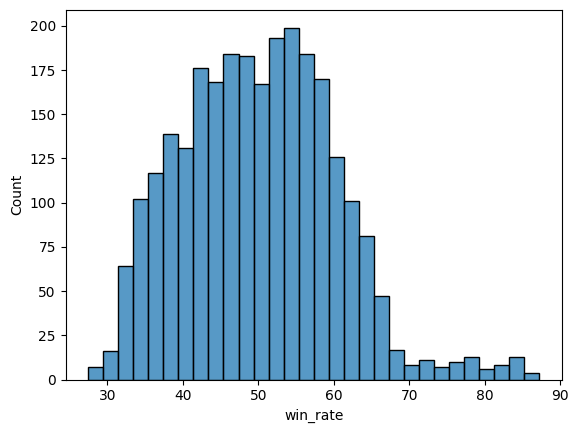

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=data, x='win_rate', bins=30)

In [8]:
# now sort by win rate
data.sort_values(by='win_rate', ascending=False, inplace=True)

In [9]:
import texas_hold_em_utils.relative_ranking  as rr
card_1 = Card().from_str("A", "Hearts")
card_2 = Card().from_str("6", "Hearts")
rr.get_hand_rank_details([card_1, card_2])

{'expected_win_rate': 0.5943123923785146,
 'expected_2_player_win_rate': 0.5943123923785146,
 'percentile': 82.15384615384616,
 'ideal_kelly_max': 0.18862478475702926}

In [11]:
rr.get_hand_rank_details([card_1, card_2], player_count=3)

{'expected_win_rate': 0.4266864239345187,
 'expected_2_player_win_rate': 0.5943123923785146,
 'percentile': 85.84615384615385,
 'ideal_kelly_max': 0.14002963590177808}